In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [349]:
df=pd.read_excel("hotel_reviews.xlsx",sheet_name='hotel_reviews')
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [350]:
#importing libraries for text processing

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
nltk.download('punkt') #this  divides a text into a list of sentences by using an unsupervised algorithm
ps=PorterStemmer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\89bal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\89bal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [351]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"couldn\'t", "could not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [352]:
def cleaning(text):
    text = decontracted(text)
    text = text.lower()                              #lowering the text
    text = text.replace('the media could not be loaded.','')
    text = re.sub(r'#\S+','',text)                   #Remove the hyper link
    text = re.sub('[^a-z]',' ',text)              #Remove the character other than alphabet
    return text

df['cleaned'] = df['Review'].apply(cleaning)
df.head()

,Review,Rating,cleaned
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monac...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game aweso...


In [353]:
df = df[['Review','cleaned']]
df

,Review,cleaned
0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,nice rooms not experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monac...
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game aweso...
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",best kept secret rd time staying charm not ...
20487,great location price view hotel great quick pl...,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",ok just looks nice modern outside desk staff ...
20489,hotel theft ruined vacation hotel opened sept ...,hotel theft ruined vacation hotel opened sept ...


In [354]:
from nltk.corpus import stopwords, wordnet

In [355]:
stop = stopwords.words('english')

In [356]:
df['tokenized'] = df['cleaned'].apply(word_tokenize)


In [357]:
df.sample(8)

,Review,cleaned,tokenized
3930,great small hotel condado just got staying win...,great small hotel condado just got staying win...,"[great, small, hotel, condado, just, got, stay..."
9116,"best hotel view 5 hotels amsterdam, located di...",best hotel view hotels amsterdam located di...,"[best, hotel, view, hotels, amsterdam, located..."
15018,pure heaven earth intercontinental hotels repu...,pure heaven earth intercontinental hotels repu...,"[pure, heaven, earth, intercontinental, hotels..."
724,not worth price stayed whirlpool suite 269 nig...,not worth price stayed whirlpool suite nig...,"[not, worth, price, stayed, whirlpool, suite, ..."
10795,great little hotel given hotel 2 couples staye...,great little hotel given hotel couples staye...,"[great, little, hotel, given, hotel, couples, ..."
18899,impressed delaware wife vacationed april 28- 5...,impressed delaware wife vacationed april ...,"[impressed, delaware, wife, vacationed, april,..."
11134,good value despite tired appearance slow lifts...,good value despite tired appearance slow lifts...,"[good, value, despite, tired, appearance, slow..."
20019,"excellent holiday, boyfriend 20s great time re...",excellent holiday boyfriend s great time re...,"[excellent, holiday, boyfriend, s, great, time..."


In [358]:
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])


In [359]:
df.head()

,Review,cleaned,tokenized,stopwords_removed
0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,nice rooms not experience hotel monaco seat...,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt..."
3,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monac...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game aweso...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


In [360]:
df['joined'] = [' '.join(map(str, i)) for i in df['stopwords_removed']]
text = ' '.join(df['joined'])

In [361]:
df.head()

,Review,cleaned,tokenized,stopwords_removed,joined
0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,nice rooms not experience hotel monaco seat...,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt...",nice rooms experience hotel monaco seattle goo...
3,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monac...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game aweso...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...


### Stemming

In [362]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['stemm']=df['joined'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df.iloc[:,-1]

0        nice hotel expens park got good deal stay hote...
1        ok noth special charg diamond member hilton de...
2        nice room experi hotel monaco seattl good hote...
3        uniqu great stay wonder time hotel monaco loca...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret rd time stay charm star ca be...
20487    great locat price view hotel great quick place...
20488    ok look nice modern outsid desk staff particul...
20489    hotel theft ruin vacat hotel open sept guest w...
20490    peopl talk ca believ excel rate hotel ye patri...
Name: stemm, Length: 20491, dtype: object

In [367]:
from textblob import Word
df['Lemmatized'] = df['stemm'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.iloc[:,-1]

0        nice hotel expens park got good deal stay hote...
1        ok noth special charg diamond member hilton de...
2        nice room experi hotel monaco seattl good hote...
3        uniqu great stay wonder time hotel monaco loca...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret rd time stay charm star ca be...
20487    great locat price view hotel great quick place...
20488    ok look nice modern outsid desk staff particul...
20489    hotel theft ruin vacat hotel open sept guest w...
20490    peopl talk ca believ excel rate hotel ye patri...
Name: Lemmatized, Length: 20491, dtype: object

In [368]:
df.head()

,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized
0,nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,nice room experi hotel monaco seattl good hote...,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt...",nice rooms experience hotel monaco seattle goo...,nice room experi hotel monaco seattl good hote...,nice room experi hotel monaco seattl good hote...
3,"unique, great stay, wonderful time hotel monac...",uniqu great stay wonder time hotel monaco loca...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time hotel monaco loca...
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...


In [369]:
# #creating a user defined function for text cleaning

def text_clean(text):
    
    text=text.lower()
    
    text=re.sub("[^a-zA-Z]"," ",text)
    text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
    text=re.sub("\w*\d\w*","",text)
    text=re.sub("\n","",text)
    
    return text

In [370]:
df['cleaned'] = df['Lemmatized'].apply(text_clean)
df


,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized
0,nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,nice room experi hotel monaco seattl good hote...,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt...",nice rooms experience hotel monaco seattle goo...,nice room experi hotel monaco seattl good hote...,nice room experi hotel monaco seattl good hote...
3,"unique, great stay, wonderful time hotel monac...",uniqu great stay wonder time hotel monaco loca...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time hotel monaco loca...
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",best kept secret rd time stay charm star ca be...,"[best, kept, secret, rd, time, staying, charm,...","[best, kept, secret, rd, time, staying, charm,...",best kept secret rd time staying charm star ca...,best kept secret rd time stay charm star ca be...,best kept secret rd time stay charm star ca be...
20487,great location price view hotel great quick pl...,great locat price view hotel great quick place...,"[great, location, price, view, hotel, great, q...","[great, location, price, view, hotel, great, q...",great location price view hotel great quick pl...,great locat price view hotel great quick place...,great locat price view hotel great quick place...
20488,"ok just looks nice modern outside, desk staff ...",ok look nice modern outsid desk staff particul...,"[ok, just, looks, nice, modern, outside, desk,...","[ok, looks, nice, modern, outside, desk, staff...",ok looks nice modern outside desk staff partic...,ok look nice modern outsid desk staff particul...,ok look nice modern outsid desk staff particul...
20489,hotel theft ruined vacation hotel opened sept ...,hotel theft ruin vacat hotel open sept guest w...,"[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruined, vacation, hotel, opened...",hotel theft ruined vacation hotel opened sept ...,hotel theft ruin vacat hotel open sept guest w...,hotel theft ruin vacat hotel open sept guest w...


In [371]:
from nltk.probability import FreqDist

In [372]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bow = vec1.transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [373]:
# top 20 Bi-gram words
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(df["cleaned"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(10)

,Bi-gram,Freq
0,stay hotel,2815
1,great locat,2219
2,staff friendli,2179
3,room clean,2141
4,minut walk,1730
5,punta cana,1730
6,hotel stay,1663
7,stay night,1604
8,hotel great,1509
9,great hotel,1505


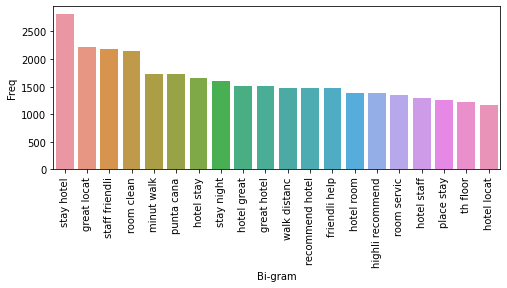

In [374]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (8, 3))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

In [375]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bow = vec1.transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [376]:
top3_words = get_top_n3_words(df["cleaned"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

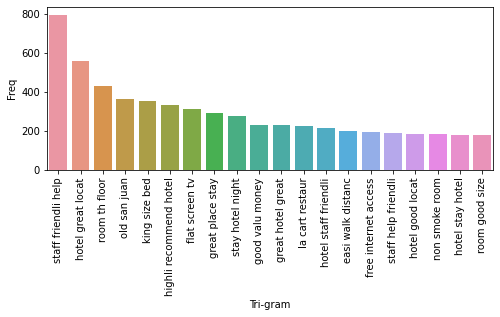

In [377]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (8, 3))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

In [378]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\89bal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\89bal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\89bal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [379]:
sw_nltk = stopwords.words('english')

In [380]:
sw_nltk.extend(['howev','ever','particularli','includ','end','put','stop','make','find','hotel','trafalgar','excel','would','realli','also','week','deliveriesrefus','lowandbeholdtwo','back','strand','palac','london','go','come'])

In [381]:
df['cleaned_1'] = df['cleaned'].str.split().map(lambda x: [word for word in x if word not in sw_nltk])

In [382]:
df['cleaned_1']=df['cleaned_1'].apply(' '.join)
df.head()

,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1
0,nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expens park got good deal stay hote...,nice expens park got good deal stay anniversar...
1,ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,nice room experi hotel monaco seattl good hote...,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt...",nice rooms experience hotel monaco seattle goo...,nice room experi hotel monaco seattl good hote...,nice room experi hotel monaco seattl good hote...,nice room experi monaco seattl good level posi...
3,"unique, great stay, wonderful time hotel monac...",uniqu great stay wonder time hotel monaco loca...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time monaco locat shor...
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...


In [383]:
df1 = df
df1.head()

,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1
0,nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expens park got good deal stay hote...,nice expens park got good deal stay anniversar...
1,ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,nice room experi hotel monaco seattl good hote...,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt...",nice rooms experience hotel monaco seattle goo...,nice room experi hotel monaco seattl good hote...,nice room experi hotel monaco seattl good hote...,nice room experi monaco seattl good level posi...
3,"unique, great stay, wonderful time hotel monac...",uniqu great stay wonder time hotel monaco loca...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time monaco locat shor...
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...


### word cloud

In [384]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [385]:
text = ' '.join(df1['cleaned_1'])


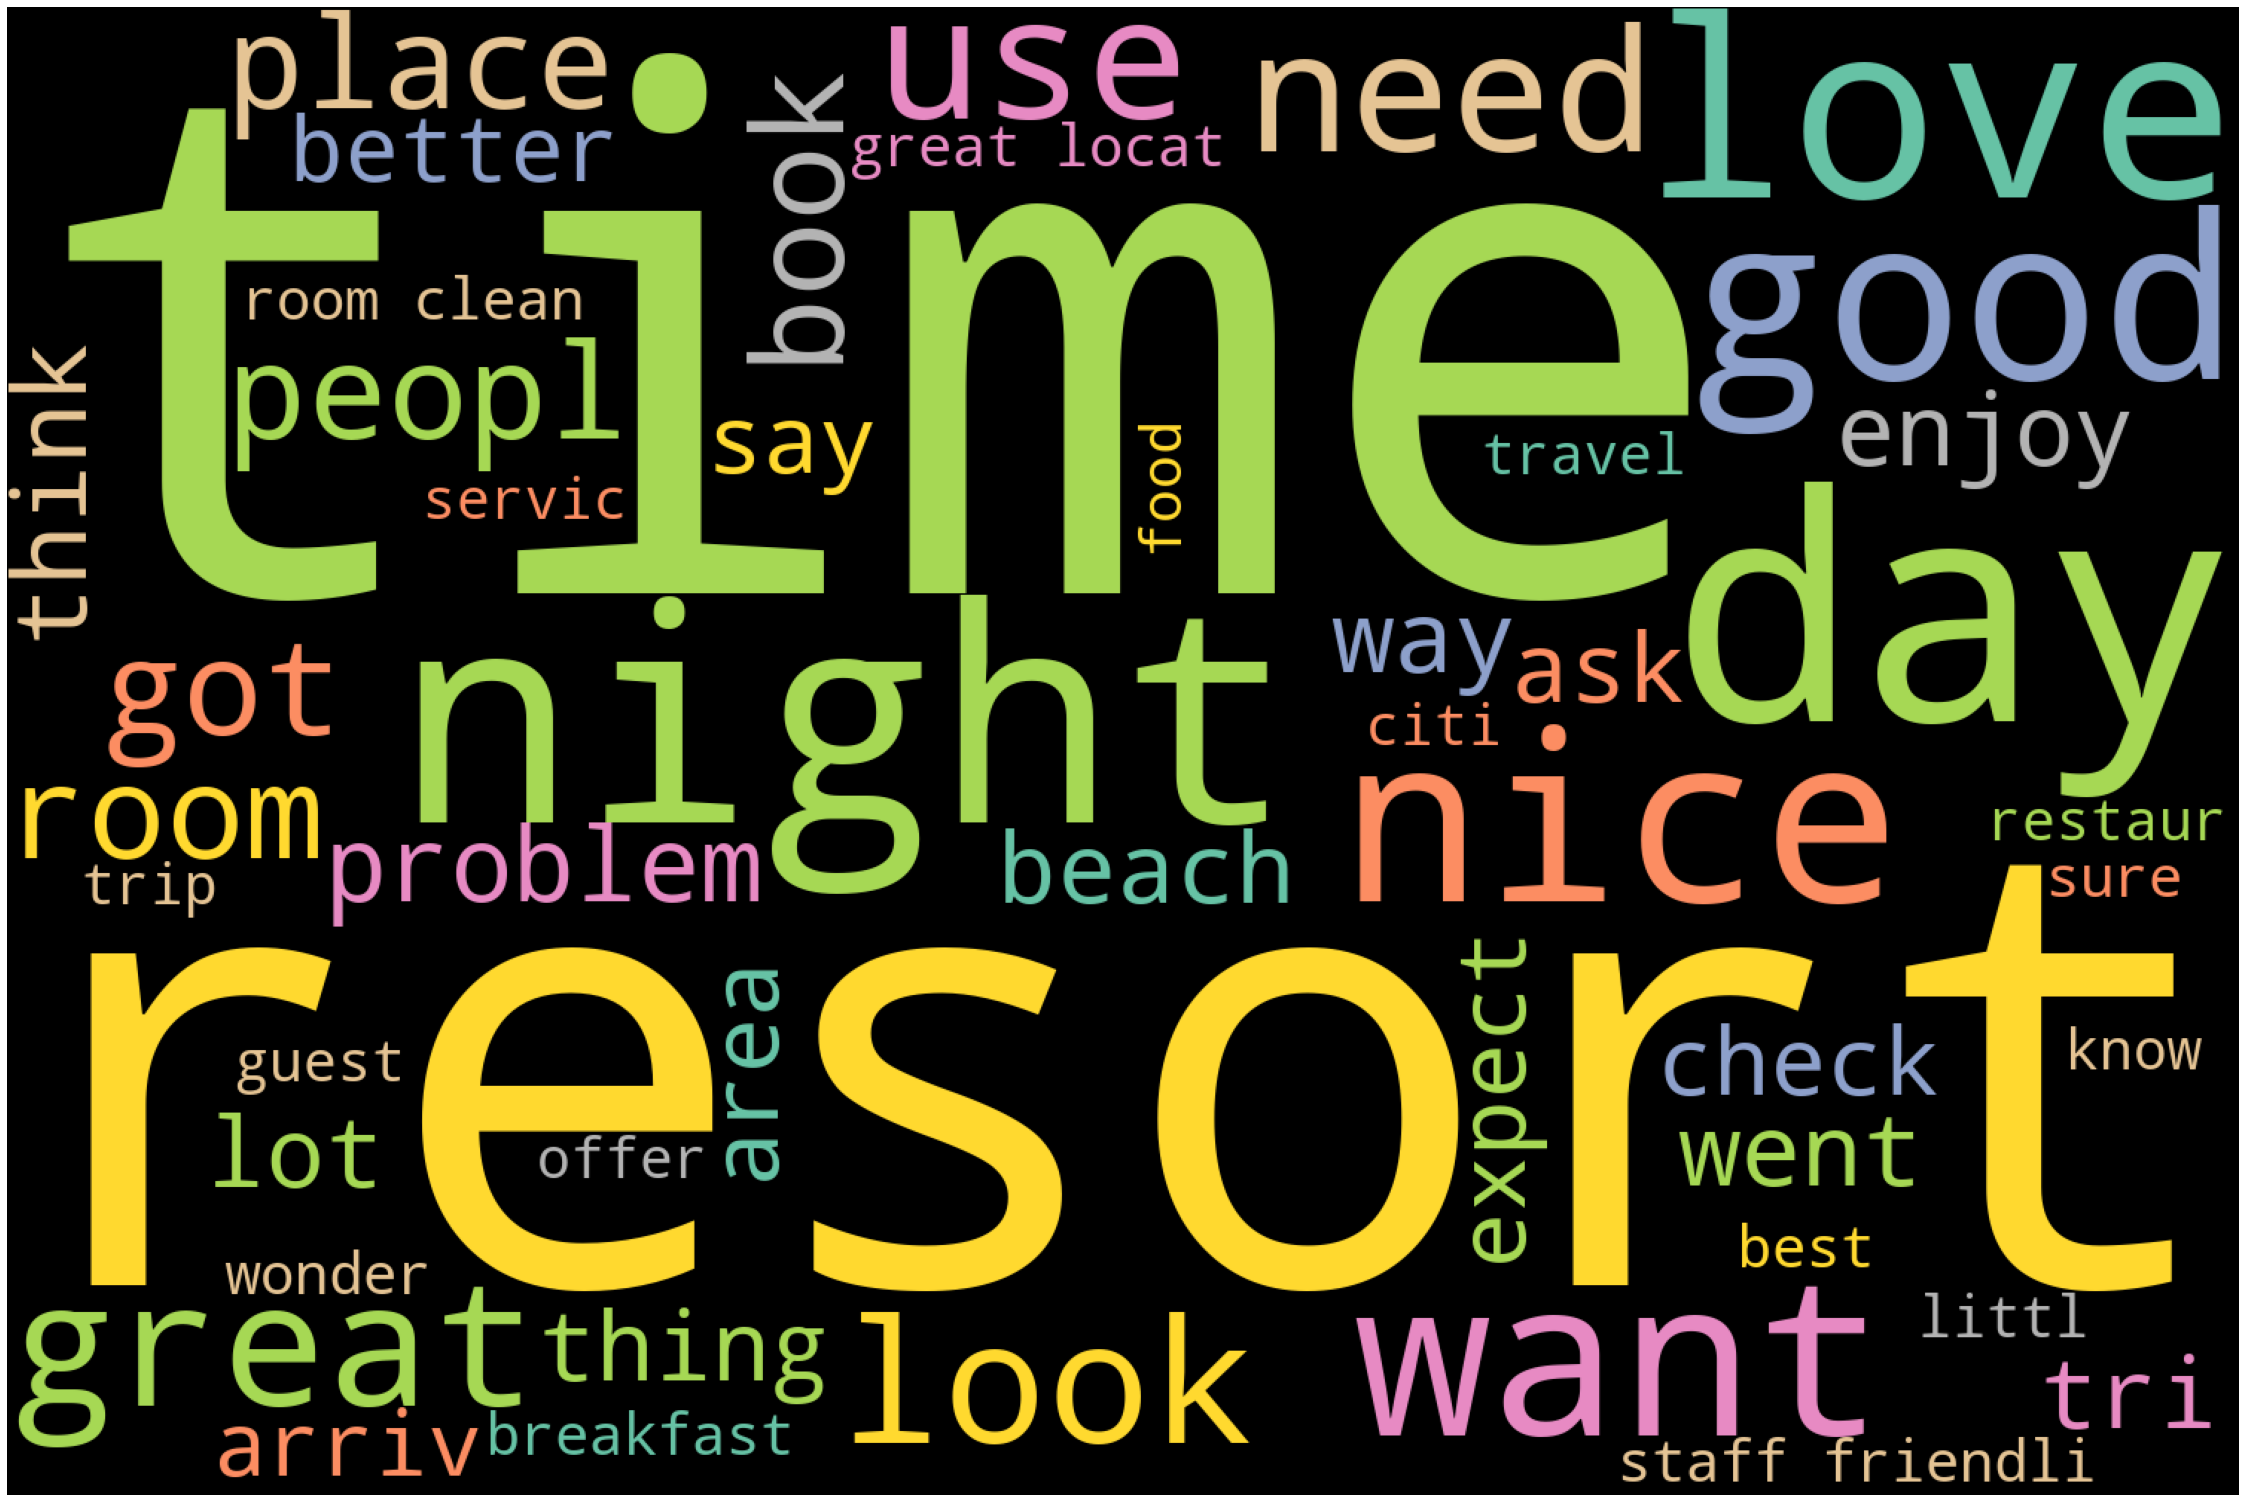

In [386]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 1500, height = 1000, background_color='black', max_words=50,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

### sentiment analysis

In [387]:
import textblob
from textblob import TextBlob

In [390]:
df1['polarity'] = round(df['Lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity),3)
df1[['Review','polarity']].head()

,Review,polarity
0,nice hotel expensive parking got good deal sta...,0.353
1,ok nothing special charge diamond member hilto...,0.312
2,nice rooms not 4* experience hotel monaco seat...,0.295
3,"unique, great stay, wonderful time hotel monac...",0.456
4,"great stay great stay, went seahawk game aweso...",0.424


### Polarity distribution across the polarity score range (-1,1)

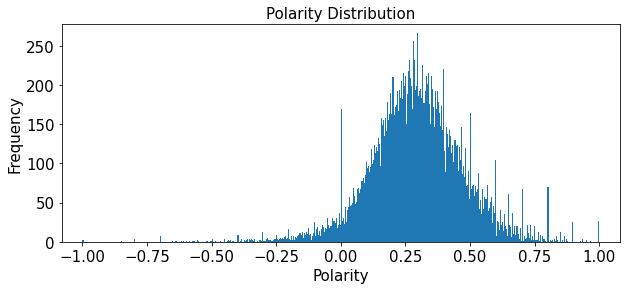

In [415]:
plt.figure(figsize=(10,4))
plt.margins(0.04)
plt.xlabel('Polarity', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=15)
plt.hist(df['polarity'], bins=500)
plt.title('Polarity Distribution', fontsize=15)
plt.show()

In [400]:
afinn = pd.read_csv("D:\DA_and_DS_class\Data_science\DS_project\Afinn.csv", sep=',', encoding='latin-1')
print(afinn.shape)
print(afinn.head())

(2477, 2)
        word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2


In [403]:
affinity_scores = afinn.set_index('word')['value'].to_dict()


In [405]:
import spacy

In [410]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [411]:
df1['sentiment_value'] = df1['Lemmatized'].apply(calculate_sentiment)
df1.head()

,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1,polarity,sentiment_value
0,nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expens park got good deal stay hote...,nice expens park got good deal stay anniversar...,0.353,24
1,ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...,0.312,39
2,nice rooms not 4* experience hotel monaco seat...,nice room experi hotel monaco seattl good hote...,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt...",nice rooms experience hotel monaco seattle goo...,nice room experi hotel monaco seattl good hote...,nice room experi hotel monaco seattl good hote...,nice room experi monaco seattl good level posi...,0.295,22
3,"unique, great stay, wonderful time hotel monac...",uniqu great stay wonder time hotel monaco loca...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time monaco locat shor...,0.456,27
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,0.424,22


In [413]:
df2 = df1[['Review','polarity','sentiment_value']] #sentiment value is derived from afinn score file
df2.head()

,Review,polarity,sentiment_value
0,nice hotel expensive parking got good deal sta...,0.353,24
1,ok nothing special charge diamond member hilto...,0.312,39
2,nice rooms not 4* experience hotel monaco seat...,0.295,22
3,"unique, great stay, wonderful time hotel monac...",0.456,27
4,"great stay great stay, went seahawk game aweso...",0.424,22


In [414]:
df['sentiment_value'].describe()

count    20491.000000
mean        16.000439
std         14.116421
min        -33.000000
25%          8.000000
50%         14.000000
75%         21.000000
max        208.000000
Name: sentiment_value, dtype: float64

### Sentiment score destribution

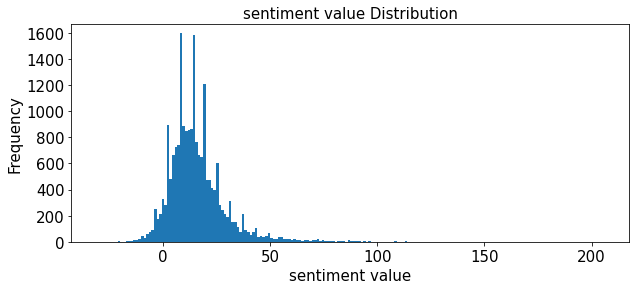

In [429]:
plt.figure(figsize=(10,4))
plt.margins(0.04)
plt.xlabel('sentiment value', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=15)
plt.hist(df['sentiment_value'], bins=200)
plt.title('sentiment value Distribution', fontsize=15)
plt.show()

In [430]:
df2['sentiment_value'].value_counts

<bound method IndexOpsMixin.value_counts of 0        24
1        39
2        22
3        27
4        22
         ..
20486    12
20487    19
20488     7
20489   -20
20490    10
Name: sentiment_value, Length: 20491, dtype: int64>

In [431]:
def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df2['sentiment']=df2['sentiment_value'].map(lambda x: sentiment(x))

In [439]:
df2.sample(3)

,Review,polarity,sentiment_value,sentiment
14418,"fabulous hotel, hotel wonderful terrific locat...",0.350,9,positive
13937,"perfect perfect consistent 5 star experience, ...",0.722,8,positive
2843,excellent vacation family stayed melia paradis...,0.145,17,positive


In [441]:
df_neutral=df[df['sentiment_value']==0]
df_positive=df[df['sentiment_value']>0]
df_negative=df[df['sentiment_value']<0]

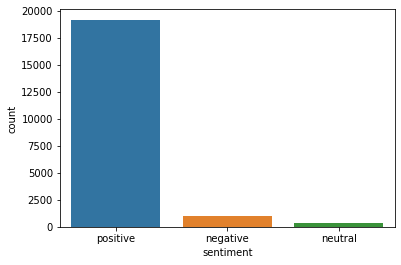

In [442]:
import seaborn as sns
sns.countplot(x='sentiment',data=df2)
plt.show()

### TFIDF vectorisation for all the classes

In [443]:
positive_reviews = df_positive['cleaned_1']
negative_reviews = df_negative['cleaned_1']
neutral_reviews = df_neutral['cleaned_1']

In [444]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix =tv.fit_transform(positive_reviews)
print(tv.get_feature_names())
print(tf_idf_matrix.toarray())

['aaa', 'abl', 'abl check', 'abl walk', 'absolut', 'absolut beauti', 'absolut love', 'absolut wonder', 'abund', 'ac', 'accademia', 'accept', 'access', 'access internet', 'access room', 'accommod', 'accomod', 'accord', 'account', 'accur', 'acknowledg', 'act', 'action', 'activ', 'actual', 'ad', 'ad bonu', 'add', 'addit', 'address', 'adequ', 'adjac', 'adjoin', 'adjoin room', 'adjust', 'admit', 'adult', 'adult child', 'advanc', 'advantag', 'adventur', 'advertis', 'advic', 'advis', 'advisor', 'aerob', 'affect', 'affinia', 'affinia dumont', 'afford', 'afraid', 'afternoon', 'afternoon tea', 'age', 'agenc', 'agent', 'aggress', 'ago', 'agre', 'agre review', 'ahead', 'ahead time', 'air', 'air condit', 'air condit room', 'air condit work', 'air condition', 'aircon', 'aircondit', 'airi', 'airlin', 'airport', 'airport bu', 'airport shuttl', 'al', 'ala', 'ala cart', 'ala cart restaur', 'alarm', 'alarm clock', 'albeit', 'alcatraz', 'alcohol', 'alley', 'alloc', 'allow', 'alot', 'alright', 'altern', 'a

In [445]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix =tv.fit_transform(negative_reviews)
print(tv.get_feature_names())
print(tf_idf_matrix.toarray())

['abandon', 'abl', 'abl eat', 'abl sleep', 'abroad', 'absolut', 'absolut beauti', 'absolut noth', 'absolut worst', 'abysm', 'ac', 'ac work', 'accept', 'accept room', 'access', 'accid', 'accommod', 'accomod', 'accompani', 'accor', 'accord', 'account', 'account depart', 'accross', 'accur', 'accus', 'acknowledg', 'act', 'action', 'activ', 'actual', 'actual room', 'actual stay', 'ad', 'adagio', 'adam', 'adam mark', 'add', 'addit', 'addit charg', 'addit night', 'additon', 'address', 'adequ', 'adjac', 'adjoin', 'adjoin room', 'adjust', 'administr', 'admit', 'adult', 'adult child', 'advanc', 'advanc room', 'advantag', 'adventur', 'advertis', 'advic', 'advic stay', 'advis', 'advis reserv', 'advis stay', 'advisor', 'affair', 'affect', 'affinia', 'afford', 'afraid', 'afternoon', 'age', 'agenc', 'agent', 'aggrav', 'ago', 'agre', 'agre review', 'agusti', 'ahead', 'air', 'air condit', 'air condit room', 'air condit work', 'air condition', 'aircon', 'airi', 'airlin', 'airport', 'al', 'al la', 'al la

In [446]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix =tv.fit_transform(neutral_reviews)
print(tv.get_feature_names())
print(tf_idf_matrix.toarray())

['abl', 'absolut', 'absolut noth', 'absoult', 'ac', 'accept', 'access', 'accommod', 'accomod', 'accord', 'account', 'accur', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'addit', 'address', 'adequ', 'adjac', 'adjoin', 'adjoin build', 'admit', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advic pay', 'advic pay littl', 'advic stay', 'advis', 'advis book', 'advisor', 'affect', 'afraid', 'afternoon', 'age', 'agent', 'aggress', 'ago', 'agora', 'agre', 'agre travel', 'ahotel', 'air', 'air condit', 'air condit room', 'air condit work', 'air condition', 'aircondit', 'airlin', 'airport', 'airport shuttl', 'alarm', 'alcohol', 'allow', 'alon', 'alot', 'altern', 'altogeth', 'amaz', 'amen', 'american', 'amount', 'amsterdam', 'amsterdam citi', 'amsterdam citi center', 'annoy', 'answer', 'ant', 'ant room', 'anti', 'anybodi', 'anymor', 'anyon', 'anyway', 'apart', 'apart describ', 'apolog', 'appar', 'appear', 'appet', 'appl', 'appli', 'appoint', 'appoint clean', 'apprehens', 'april', 'area'

In [ ]:
import textblob
from textblob import TextBlob

In [ ]:
df["Polarity_score"]=(round(df["cleaned"].apply(lambda x:TextBlob(x).sentiment.polarity),3))

In [132]:
import numpy as np
import pandas as pd 
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt

### Bi-gram for positive reviews

In [447]:
def get_top_n2_words(corpus, n=None):
    vec1 = TfidfVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [448]:
top2_words = get_top_n2_words(df_positive['cleaned_1'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(5)

,Bi-gram,Freq
0,great locat,374.655039
1,staff friendli,344.168690
2,room clean,317.041860
3,stay night,301.889777
4,minut walk,264.144618


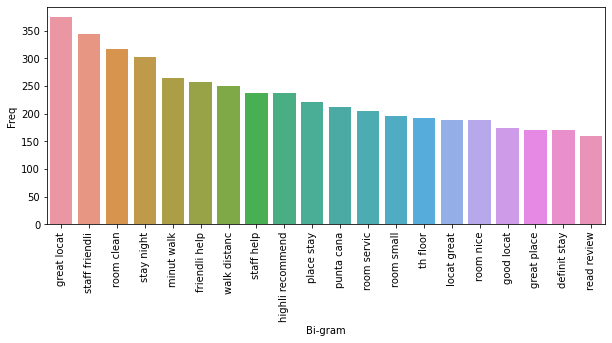

In [449]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 4))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

### Bi-gram for negative reviews

In [ ]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [451]:
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(df_negative['cleaned_1'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(5)

,Bi-gram,Freq
0,room small,13.865362
1,stay night,13.609847
2,punta cana,12.620405
3,credit card,12.134110
4,custom servic,11.926347


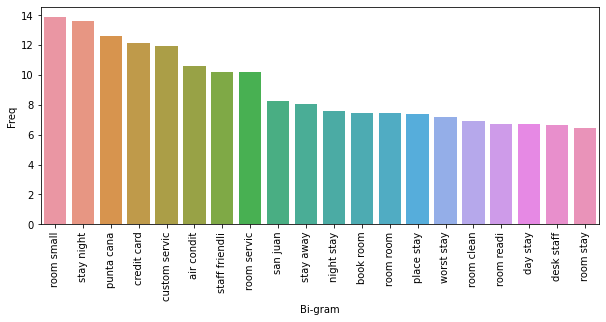

In [452]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 4))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

### Tri-gram for positive reviews

In [453]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [454]:
top3_words = get_top_n3_words(df_positive['cleaned_1'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(5)

,Tri-gram,Freq
0,staff friendli help,837
1,room th floor,424
2,old san juan,350
3,king size bed,335
4,flat screen tv,310


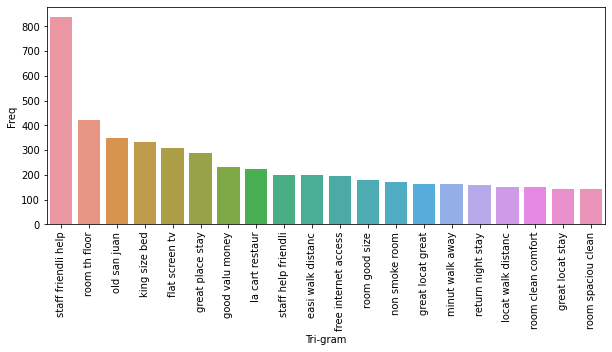

In [455]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 4))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

### tri-gram for negative reviews

In [456]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [457]:
top3_words = get_top_n3_words(df_negative['cleaned_1'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(5)

,Tri-gram,Freq
0,king size bed,15
1,charg credit card,13
2,old san juan,12
3,room doubl bed,11
4,non smoke room,10


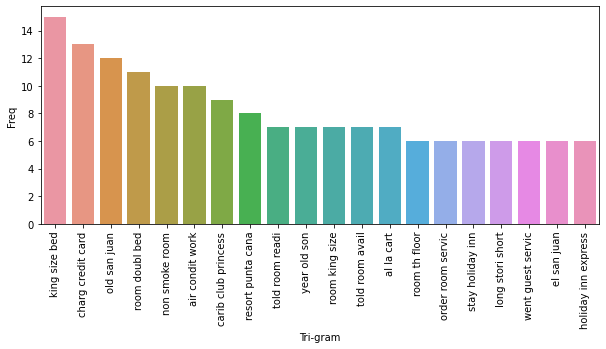

In [458]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 4))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

In [464]:
df1.head()

,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1,polarity,sentiment_value
0,nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expens park got good deal stay hote...,nice expens park got good deal stay anniversar...,0.353,24
1,ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...,0.312,39
2,nice rooms not 4* experience hotel monaco seat...,nice room experi hotel monaco seattl good hote...,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt...",nice rooms experience hotel monaco seattle goo...,nice room experi hotel monaco seattl good hote...,nice room experi hotel monaco seattl good hote...,nice room experi monaco seattl good level posi...,0.295,22
3,"unique, great stay, wonderful time hotel monac...",uniqu great stay wonder time hotel monaco loca...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time monaco locat shor...,0.456,27
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,0.424,22


In [465]:
def sentiment(x):
    if x<0:
        return 'negative'
    
    elif x==0:
        return 'neutral'
    
    else:
        return 'positive'
    
df1['sentiment']=df1['sentiment_value'].map(lambda x: sentiment(x))
df1.head()

,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1,polarity,sentiment_value,sentiment
0,nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expens park got good deal stay hote...,nice expens park got good deal stay anniversar...,0.353,24,positive
1,ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...,0.312,39,positive
2,nice rooms not 4* experience hotel monaco seat...,nice room experi hotel monaco seattl good hote...,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt...",nice rooms experience hotel monaco seattle goo...,nice room experi hotel monaco seattl good hote...,nice room experi hotel monaco seattl good hote...,nice room experi monaco seattl good level posi...,0.295,22,positive
3,"unique, great stay, wonderful time hotel monac...",uniqu great stay wonder time hotel monaco loca...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time monaco locat shor...,0.456,27,positive
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,0.424,22,positive


In [466]:
df1.to_csv("finaldata.csv",index=True)
df1.head()

,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1,polarity,sentiment_value,sentiment
0,nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expens park got good deal stay hote...,nice expens park got good deal stay anniversar...,0.353,24,positive
1,ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...,0.312,39,positive
2,nice rooms not 4* experience hotel monaco seat...,nice room experi hotel monaco seattl good hote...,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt...",nice rooms experience hotel monaco seattle goo...,nice room experi hotel monaco seattl good hote...,nice room experi hotel monaco seattl good hote...,nice room experi monaco seattl good level posi...,0.295,22,positive
3,"unique, great stay, wonderful time hotel monac...",uniqu great stay wonder time hotel monaco loca...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time monaco locat shor...,0.456,27,positive
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,0.424,22,positive


In [472]:
df=pd.read_csv('finaldata.csv')
df.head()

,Unnamed: 0,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1,polarity,sentiment_value,sentiment
0,0,nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expens park got good deal stay hote...,nice expens park got good deal stay anniversar...,0.353,24,positive
1,1,ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,"['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...,0.312,39,positive
2,2,nice rooms not 4* experience hotel monaco seat...,nice room experi hotel monaco seattl good hote...,"['nice', 'rooms', 'not', 'experience', 'hotel'...","['nice', 'rooms', 'experience', 'hotel', 'mona...",nice rooms experience hotel monaco seattle goo...,nice room experi hotel monaco seattl good hote...,nice room experi hotel monaco seattl good hote...,nice room experi monaco seattl good level posi...,0.295,22,positive
3,3,"unique, great stay, wonderful time hotel monac...",uniqu great stay wonder time hotel monaco loca...,"['unique', 'great', 'stay', 'wonderful', 'time...","['unique', 'great', 'stay', 'wonderful', 'time...",unique great stay wonderful time hotel monaco ...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time monaco locat shor...,0.456,27,positive
4,4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"['great', 'stay', 'great', 'stay', 'went', 'se...","['great', 'stay', 'great', 'stay', 'went', 'se...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,0.424,22,positive
